# Neural Net

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# you may need to install networkx with pip
import networkx as nx
import colorsys

# Method for display NNs

In [43]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)

# Read in dataset and drop the target variable

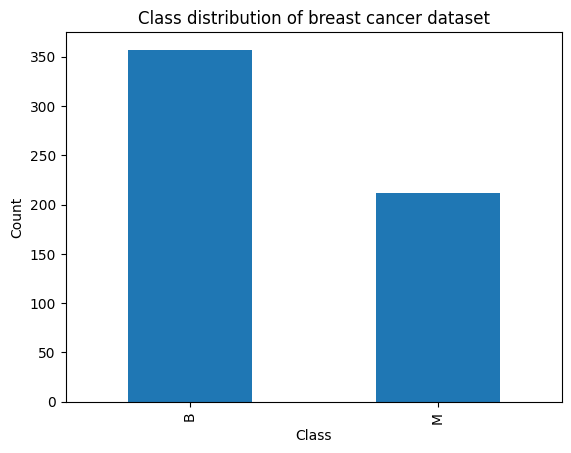

In [56]:
# Load the breast cancer dataset dropping first 2 columns
wdbc = pd.read_csv('data/wdbc.data', header=None)

#plot chart of class distribution
wdbc[1].value_counts().plot(kind='bar')
plt.title('Class distribution of breast cancer dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# split into x and y and encode the target variable to 0 and 1 for malignant and benign
X = wdbc.iloc[:, 2:]
y = wdbc.iloc[:, 1]
le = LabelEncoder()
y = le.fit_transform(y)



# Create train and test set

In [45]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Simple One Hidden Layer NN

In [46]:
# Define and train the MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=500) # 1 hidden layer with 3 neurons
mlp1.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=3, max_iter=50)

[[70  1]
 [10 33]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        71
           1       0.97      0.77      0.86        43

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



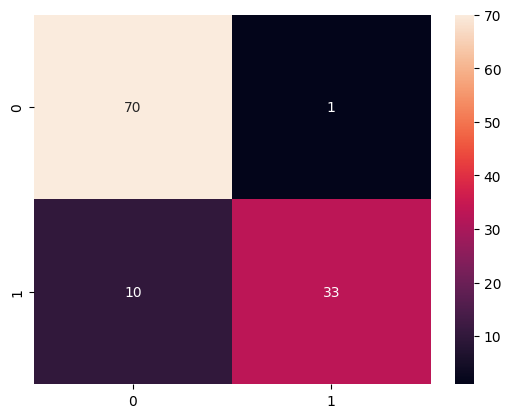

In [47]:
# Evaluate the model
predictions1 = mlp1.predict(X_test)
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))

# display the confusion matrix
cm = confusion_matrix(y_test, predictions1)
sns.heatmap(cm, annot=True)
plt.show()

In [48]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(np.unique(y))))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp1.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp1.coefs_)):
    m = len(mlp1.coefs_[l])
    n = len(mlp1.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp1.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp1.intercepts_[l]) for l,_ in enumerate(mlp1.intercepts_)]))

This dataset has 30 input nodes and 2 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 30x3 (30 nodes feeding into a layer of 3 nodes)
  1: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [3, 1] intercepts, one for each node


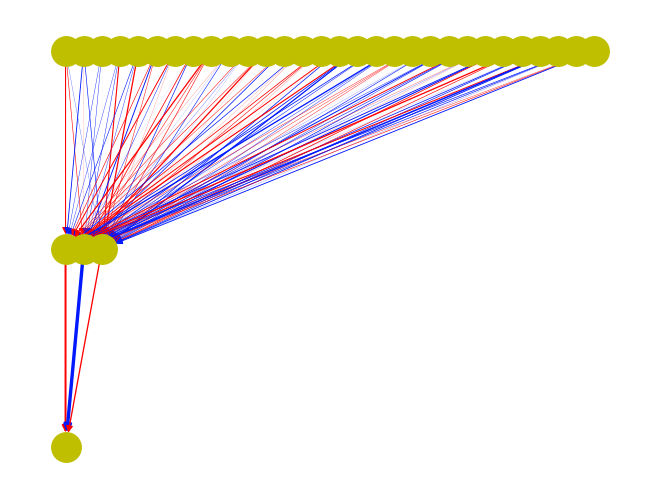

In [49]:
show_ann(mlp1)

# 2 Hidden Layers NN

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



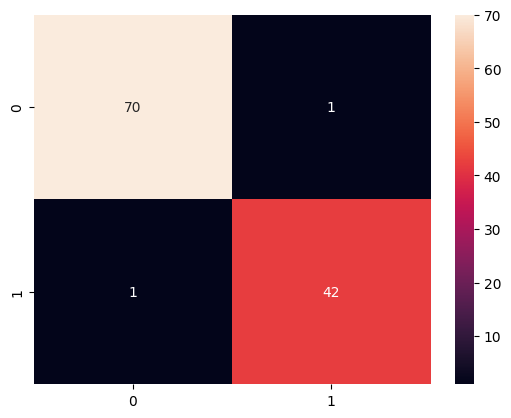

This dataset has 30 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 30x10 (30 nodes feeding into a layer of 10 nodes)
  1: 10x3 (10 nodes feeding into a layer of 3 nodes)
  2: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [10, 3, 1] intercepts, one for each node


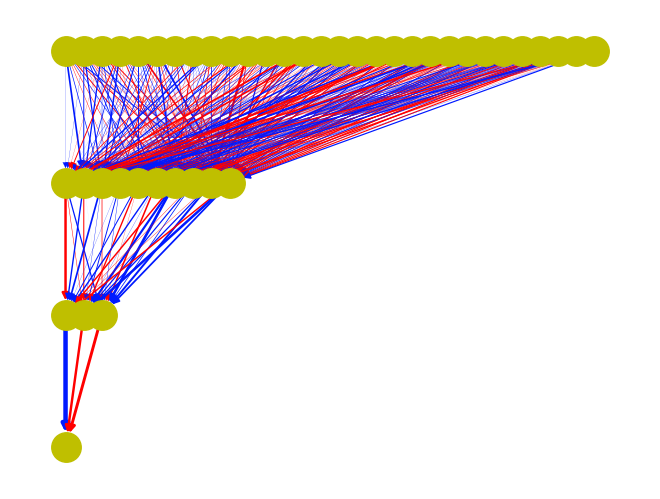

In [50]:
# Define and train the MLPClassifier
mlp2 = MLPClassifier(hidden_layer_sizes=(10,3), max_iter=500)  # 2 hidden layers with 10 and 3 neurons
mlp2.fit(X_train, y_train)

# Evaluate the model
predictions2 = mlp2.predict(X_test)
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

# display the confusion matrix
cm = confusion_matrix(y_test, predictions2)
sns.heatmap(cm, annot=True)
plt.show()

print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(np.unique(y))))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp2.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp2.coefs_)):
    m = len(mlp2.coefs_[l])
    n = len(mlp2.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp2.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp2.intercepts_[l]) for l,_ in enumerate(mlp2.intercepts_)]))

show_ann(mlp2)

# 3 Hidden Layers NN

[[68  3]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


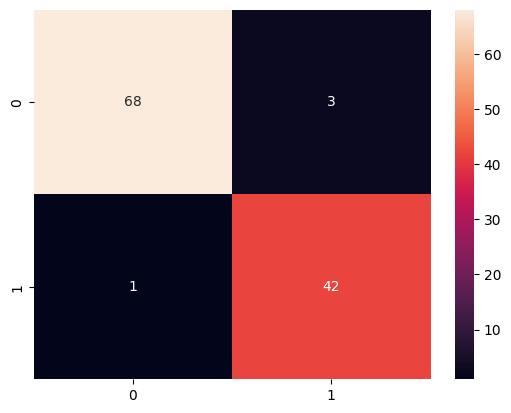

This dataset has 30 input nodes and 2 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 30x15 (30 nodes feeding into a layer of 15 nodes)
  1: 15x7 (15 nodes feeding into a layer of 7 nodes)
  2: 7x3 (7 nodes feeding into a layer of 3 nodes)
  3: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [15, 7, 3, 1] intercepts, one for each node


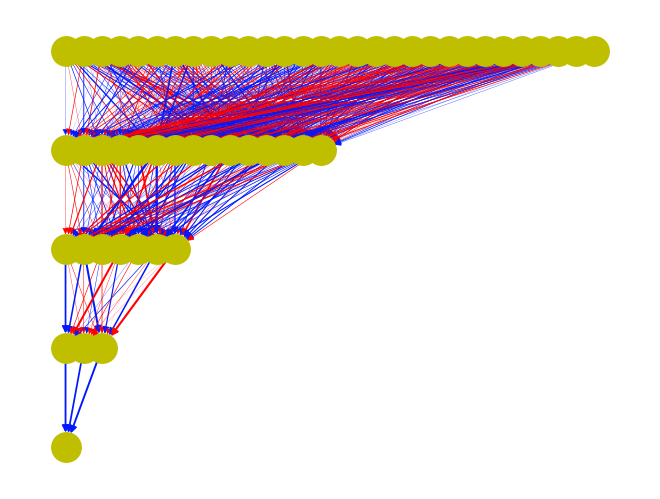

In [55]:
# Define and train the MLPClassifier
mlp3 = MLPClassifier(hidden_layer_sizes=(15, 7, 3), max_iter=500)  # 3 hidden layers with 15, 7 and 3 neurons
mlp3.fit(X_train, y_train)

# Evaluate the model
predictions3 = mlp3.predict(X_test)
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))

# display the confusion matrix
cm = confusion_matrix(y_test, predictions3)
sns.heatmap(cm, annot=True)
plt.show()

print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(np.unique(y))))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp3.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp3.coefs_)):
    m = len(mlp3.coefs_[l])
    n = len(mlp3.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp3.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp3.intercepts_[l]) for l,_ in enumerate(mlp3.intercepts_)]))

show_ann(mlp3)